<a href="https://colab.research.google.com/github/L4r1Cardoso/MVP/blob/main/MVP_analise_de_dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

## Descrição
Utilizando o dataset "Data Science Job Salaries" este projeto irá analisar os dados de salários para vagas de Data Science em diferentes países e contextos. Pretende-se identificar padrões que influenciam nos salários, como o nível de experiência, localização geográfica e tipo de trabalho.

## Objetivos
- Analisar a relação entre diversos fatores (como experiência, local de trabalho, país) e o salário dos profissionais de Data Science.
- Tipo de aprendizado: supervisionado (previsão de salários) ou não supervisionado (análise exploratória).
- Premissas: Países desenvolvidos tendem a ter salários mais altos e cargos com maior senioridade pagam mais.
- Restrições: O dataset pode conter valores discrepantes ou faltantes que devem ser tratados.

## Atributos do dataset
- `Unnamed`: id
- `work_year`: Ano de trabalho.
- `experience_level`: Nível de experiência (EN, MI, SE, EX).
- `employment_type`: Tipo de contrato (full-time, part-time, etc.).
- `job_title`: Título do cargo.
- `salary`: Salário bruto.
- `salary_currency`: Moeda do salário.
- `salary_in_usd`: Salário convertido para USD.
- `employee_residence`: País de residência do empregado.
- `remote_ratio`: Proporção de trabalho remoto (0, 50, 100).
- `company_location`: Localização da empresa.
- `company_size`: Tamanho da empresa (S, M, L).

#Análise de dados

In [41]:
# Importando as bibliotecas: "Pandas", "Matplotlib", "Seaborn" e "Numpy"
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando o dataset
url = "https://raw.githubusercontent.com/L4r1Cardoso/MVP/refs/heads/main/ds_salaries.csv"  # link do dataset no repositório público do GitHub em formato raw
df = pd.read_csv(url)

##Estatísticas Descritivas

In [10]:
# Consultando o número de linhas e colunas do dataset
num_linhas, num_colunas = df.shape
print(f"O dataset contém {num_linhas} instâncias e {num_colunas} atributos.")

O dataset contém 607 instâncias e 12 atributos.


In [12]:
# Verificando o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
# Verificando as primeiras linhas do dataset
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# Verificando estatísticas descritivas das colunas numéricas
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [14]:
# Verificando se há valores faltantes
df.isnull().sum()


,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [34]:
# Filtrando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Resumo estatístico
summary = df[numeric_cols].describe().T  # Transpondo para melhor visualização

# Calculando a mediana, moda e número de valores ausentes
summary['median'] = df[numeric_cols].median()
summary['mode'] = df[numeric_cols].mode().iloc[0]  # A primeira moda
summary['missing_values'] = df[numeric_cols].isnull().sum()

# Selecionando apenas as colunas numéricas
numeric_summary = summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median', 'mode', 'missing_values']]
print(numeric_summary)

               count           mean           std     min      25%       50%  \
Unnamed: 0     607.0     303.000000  1.753701e+02     0.0    151.5     303.0   
work_year      607.0    2021.405272  6.921330e-01  2020.0   2021.0    2022.0   
salary         607.0  324000.062603  1.544357e+06  4000.0  70000.0  115000.0   
salary_in_usd  607.0  112297.869852  7.095726e+04  2859.0  62726.0  101570.0   
remote_ratio   607.0      70.922570  4.070913e+01     0.0     50.0     100.0   

                    75%         max    median      mode  missing_values  
Unnamed: 0        454.5       606.0     303.0       0.0               0  
work_year        2022.0      2022.0    2022.0    2022.0               0  
salary         165000.0  30400000.0  115000.0   80000.0               0  
salary_in_usd  150000.0    600000.0  101570.0  100000.0               0  
remote_ratio      100.0       100.0     100.0     100.0               0  


Observações:

- O dataset parece completo, sem valores faltantes, mas alguns valores podem ser discrepantes.

- A coluna `salary_in_usd` contém a variável numérica de maior interesse para as análises.

- Tipos de dados dos atributos:

  `Unnamed`: int (número inteiro)

  `work_year`: int (número inteiro)

  `experience_level`: object (strings ou outros tipos)

  `employment_type`: object (strings ou outros tipos)

  `job_title`: object (strings ou outros tipos)

  `salary`: int (número inteiro)

  `salary_currency`: object (strings ou outros tipos)

  `salary_in_usd`: int (número inteiro)

  `employee_residence`: object (strings ou outros tipos)

  `remote_ratio`: int (número inteiro)

  `company_location`: object (strings ou outros tipos)

  `company_size`: object (strings ou outros tipos)

  `dtype`: object (strings ou outros tipos)

Análise do resumo estatístico apresentado:
    
    1. Atributo: Unnamed: 0

    Count: 607
    Média: 303.0
    Desvio Padrão: 175.37
    Mínimo: 0.0
    Máximo: 606.0
    Mediana: 303.0
    Moda: 0.0
    Valores Ausentes: 0

  Análise: Esse atributo parece ser um índice ou identificador, que não contribui diretamente para a análise de salários. A moda sendo 0 pode indicar que muitos registros são novos ou que a numeração é sequencial.

    2. Atributo: work_year

    Count: 607
    Média: 2021.41
    Desvio Padrão: 0.69
    Mínimo: 2020.0
    Máximo: 2022.0
    Mediana: 2022.0
    Moda: 2022.0
    Valores Ausentes: 0

  Análise: A maioria dos dados refere-se a anos recentes (2021 e 2022), com a moda indicando que 2022 é o ano mais frequente. Isso pode indicar que os dados estão mais concentrados em empregos recentes.

    3. Atributo: salary

    Count: 607
    Média: 324,000.06
    Desvio Padrão: 1,544,357.00
    Mínimo: 4,000.0
    Máximo: 30,400,000.0
    Mediana: 115,000.0
    Moda: 80,000.0
    Valores Ausentes: 0

  Análise: A média é bastante alta, mas o desvio padrão muito grande sugere a presença de outliers (salários extremamente altos). A mediana de 115,000.0 indica que metade dos salários está abaixo desse valor, mostrando que a distribuição pode ser assimétrica.

    4. Atributo: salary_in_usd

    Count: 607
    Média: 112,297.87
    Desvio Padrão: 70,957.26
    Mínimo: 2,859.0
    Máximo: 600,000.0
    Mediana: 101,570.0
    Moda: 100,000.0
    Valores Ausentes: 0

  Análise: Semelhante ao atributo salary, a média é maior que a mediana, sugerindo que existem alguns salários em dólares muito altos que estão puxando a média para cima. A moda também está próxima da mediana, indicando que 100,000.0 é um salário comum.

    5. Atributo: remote_ratio

    Count: 607
    Média: 70.92
    Desvio Padrão: 40.71
    Mínimo: 0.0
    Máximo: 100.0
    Mediana: 100.0
    Moda: 100.0
    Valores Ausentes: 0

  Análise: A média e a mediana estão próximas de 100, sugerindo que a maioria dos trabalhadores está em regime de trabalho remoto total. O desvio padrão indica alguma variação, mas a concentração em 100 é alta.

**Percepções da Análise**

* Outliers: É importante considerar como os outliers em salary e salary_in_usd
podem afetar análises futuras. Você pode querer investigar esses casos ou aplicar técnicas para lidar com outliers.

* Análise Visual: Seria útil visualizar essas distribuições, especialmente para salary e salary_in_usd, para entender melhor a forma da distribuição e a presença de outliers.

* Relações entre Variáveis: Considere explorar correlações entre salary, salary_in_usd, e remote_ratio, e como esses fatores podem variar por ano (work_year).

##Visualizações

1. Distribuição de Atributos Numéricos

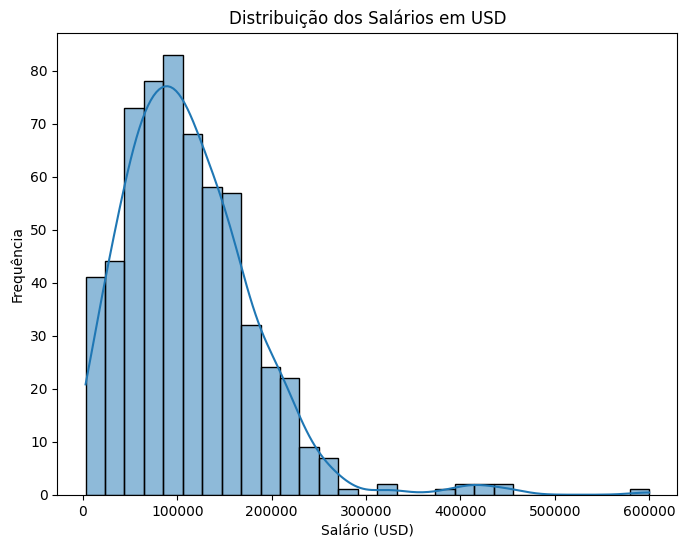

In [15]:
# Verificando a distribuição do salário em USD
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

Observação:

* O histograma mostra que a maioria dos salários está concentrada, o que indica
uma distribuição assimétrica. Isso sugere a presença de outliers, que podem ser salários muito altos.

2. Distribuição de Atributos Categóricos

<ipython-input-19-424997ba737b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=df, palette='viridis')


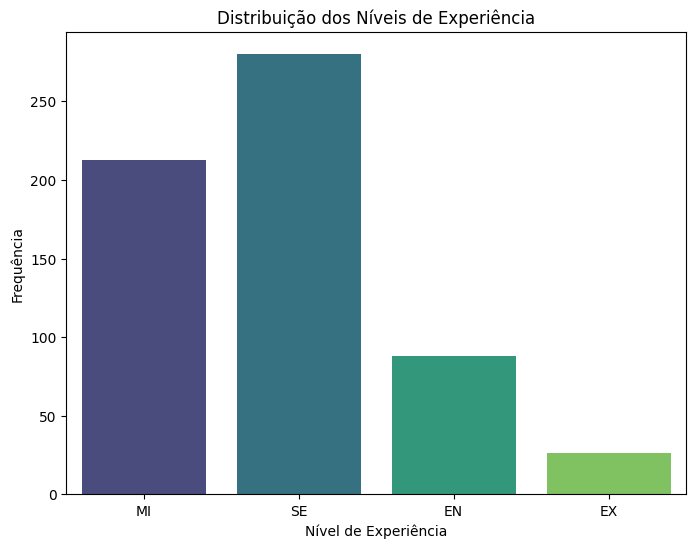

In [19]:
# Verificando a distribuição dos níveis de experiência
plt.figure(figsize=(8, 6))
sns.countplot(x='experience_level', data=df, palette='viridis')
plt.title('Distribuição dos Níveis de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Frequência')
plt.show()

Observação:

* A maioria dos registros estão concentrados no nível de experiência SE (Senior-level). Há uma quantidade significativamente menor de dados para Entry-level (EN) e Executive (EX).

<ipython-input-17-43009145e144>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_type', data=df, palette='magma')


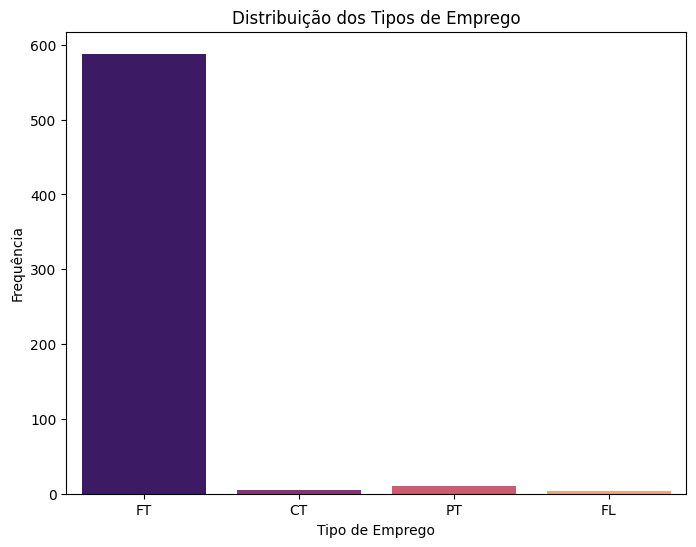

In [17]:
# Verificando a distribuição do tipo de emprego
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', data=df, palette='magma')
plt.title('Distribuição dos Tipos de Emprego')
plt.xlabel('Tipo de Emprego')
plt.ylabel('Frequência')
plt.show()

Observação:

* A maioria dos registros refere-se ao tipo de emprego Full-time (FT), enquanto Part-time (PT), Contract (CT) e Freelance (FL) estão sub-representados.

3. Distribuição por País e Localização da Empresa

<ipython-input-20-fc6f2fc7539c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='employee_residence', data=df, order=df['employee_residence'].value_counts().index, palette='coolwarm')


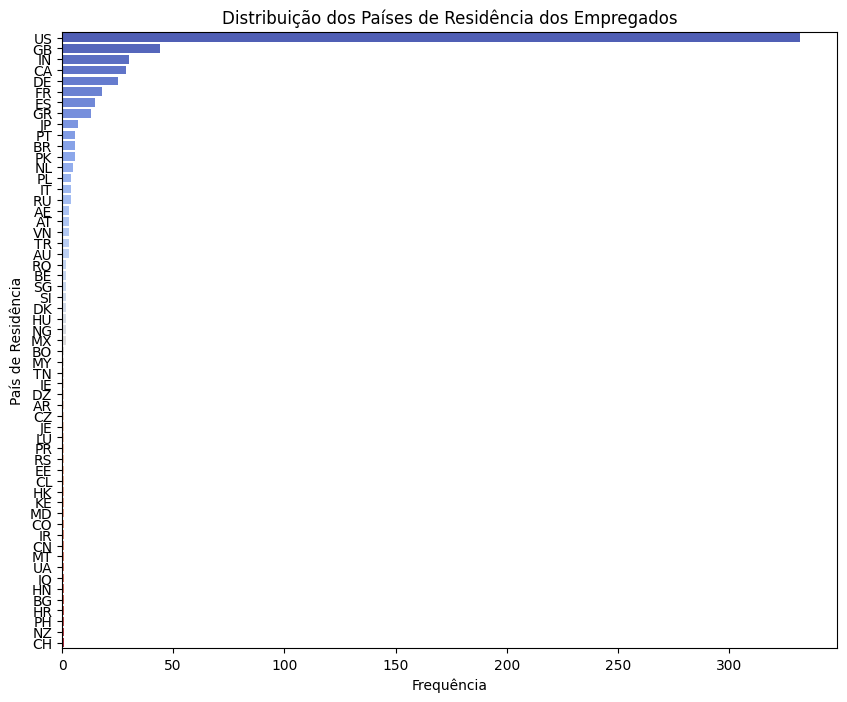

In [20]:
# Verificando a distribuição do país de residência dos empregados
plt.figure(figsize=(10, 8))
sns.countplot(y='employee_residence', data=df, order=df['employee_residence'].value_counts().index, palette='coolwarm')
plt.title('Distribuição dos Países de Residência dos Empregados')
plt.ylabel('País de Residência')
plt.xlabel('Frequência')
plt.show()

Observação:

* Os gráficos mostram que a maioria dos empregados está concentrada em um pequeno número de países, como os Estados Unidos e Reino Unido, com vários outros países apresentando poucos registros.

4. Análise Combinada: Salário vs Nível de Experiência

<ipython-input-21-06e6eb9b34d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='Set2')


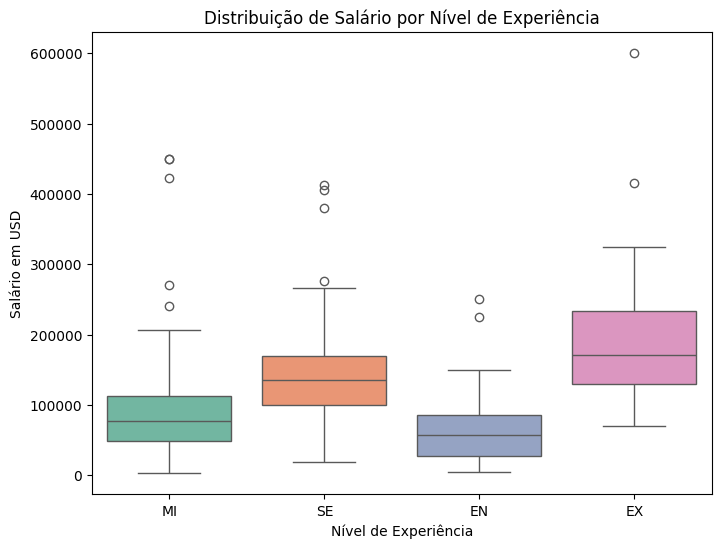

In [21]:
# Comparando salário com nível de experiência
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='Set2')
plt.title('Distribuição de Salário por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.show()

Observação:
* O boxplot revela que, em geral, os salários aumentam com o nível de experiência, mas há uma sobreposição considerável entre os salários de Mid-level (MI) e Senior-level (SE). Existem também vários outliers, especialmente no nível Executive (EX), indicando grandes variações salariais.



5. Análise Combinada: Salário vs Tamanho da Empresa

<ipython-input-22-604add6a3bd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='husl')


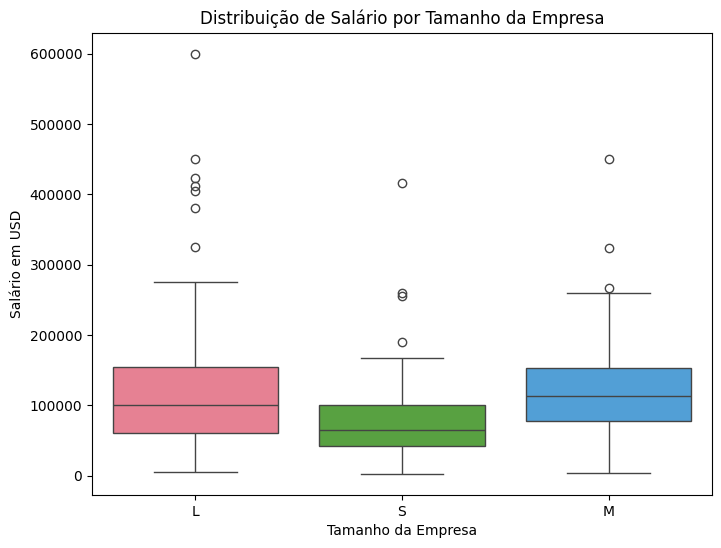

In [22]:
# Comparando salário com o tamanho da empresa
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='husl')
plt.title('Distribuição de Salário por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário em USD')
plt.show()

Observação:

* Empresas Large (L) tendem a pagar salários significativamente mais altos em comparação com Small (S) e Medium (M). No entanto, há uma sobreposição nos salários entre empresas médias e pequenas. O boxplot também indica a presença de outliers para empresas de todos os tamanhos, especialmente nas empresas grandes.

Considerações:

**Outliers**: A presença de outliers em vários atributos sugere a necessidade de remover ou tratá-los adequadamente, como por meio de técnicas de remoção ou transformação (logarítmica, por exemplo).

**Balanceamento de Classes**: Muitos atributos categóricos, como experience_level e employment_type, estão desbalanceados. Para modelos preditivos, será necessário balancear essas classes para evitar que o modelo seja enviesado para as classes majoritárias.

**Agrupamento de Categorias**: A reclassificação ou agrupamento de atributos categóricos, como países ou tipos de emprego, pode ajudar a reduzir o impacto de valores isolados ou sub-representados.

Cada uma dessas considerações ajuda a garantir que o pré-processamento seja adequado para melhorar a qualidade dos dados e, por consequência, a performance de futuros modelos de machine learning.

#Pré-processamento de dados

##Normalização/Padronização

Normalização | Distribuição de salários

In [40]:
# Visualizar a coluna original de salários
print("Salários Originais:")
print(df['salary'].head())

# Aplicar transformação logarítmica nos salários
df['log_salary'] = np.log1p(df['salary'])

# Visualizar a nova coluna de salários transformados
print("\nSalários Transformados (Logarítmicos):")
print(df[['salary', 'log_salary']].head())

# Visualizar estatísticas descritivas da coluna de salários transformados
print("\nResumo Estatístico dos Salários Transformados:")
print(df['log_salary'].describe())

Salários Originais:
0     70000
1    260000
2     85000
3     20000
4    150000
Name: salary, dtype: int64

Salários Transformados (Logarítmicos):
   salary  log_salary
0   70000   11.156265
1  260000   12.468441
2   85000   11.350418
3   20000    9.903538
4  150000   11.918397

Resumo Estatístico dos Salários Transformados:
count    607.000000
mean      11.654602
std        1.005007
min        8.294300
25%       11.156265
50%       11.652696
75%       12.013707
max       17.229953
Name: log_salary, dtype: float64


##One-Hot Encoding para Variáveis Categóricas

Balanceamento das Classes | Nível de Experiência

In [47]:
# Verificar a distribuição das classes de nível de experiência antes do balanceamento
print("Distribuição das classes antes do balanceamento:")
print(Counter(df['experience_level']))

# Separar as variáveis independentes (X) e dependentes (y)
X = df.drop('experience_level', axis=1)  # Remover a coluna de classe
y = df['experience_level']  # Coluna de classe

# Aplicar One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True)  # Remove a primeira coluna para evitar a armadilha da variável fictícia

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame a partir dos dados balanceados
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['experience_level'] = y_resampled

# Verificar a distribuição das classes após o balanceamento
print("\nDistribuição das classes após o balanceamento:")
print(Counter(df_resampled['experience_level']))

Distribuição das classes antes do balanceamento:
Counter({'SE': 280, 'MI': 213, 'EN': 88, 'EX': 26})

Distribuição das classes após o balanceamento:
Counter({'MI': 280, 'SE': 280, 'EN': 280, 'EX': 280})


<ipython-input-47-e38238213a19>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['experience_level'] = y_resampled


Balanceamento das Classes | Tipos de Emprego

In [49]:
# Verificar a distribuição das classes de tipos de emprego antes do balanceamento
print("Distribuição das classes antes do balanceamento:")
print(Counter(df['employment_type']))  # Substitua 'employment_type' pelo nome da coluna correspondente

# Separar as variáveis independentes (X) e dependentes (y)
X = df.drop('employment_type', axis=1)  # Remover a coluna de classe
y = df['employment_type']  # Coluna de classe

# Aplicar One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True)  # Remove a primeira coluna para evitar a armadilha da variável fictícia

# Aplicar SMOTE para oversampling com k_neighbors ajustado
smote = SMOTE(random_state=42, k_neighbors=2)  # Ajuste aqui o número de vizinhos
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame a partir dos dados balanceados
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['employment_type'] = y_resampled  # Adicionar a coluna de tipos de emprego ao DataFrame balanceado

# Verificar a distribuição das classes após o balanceamento
print("\nDistribuição das classes após o balanceamento:")
print(Counter(df_resampled['employment_type']))

Distribuição das classes antes do balanceamento:
Counter({'FT': 588, 'PT': 10, 'CT': 5, 'FL': 4})

Distribuição das classes após o balanceamento:
Counter({'FT': 588, 'CT': 588, 'PT': 588, 'FL': 588})


<ipython-input-49-63d7b6bb757b>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['employment_type'] = y_resampled  # Adicionar a coluna de tipos de emprego ao DataFrame balanceado


## Outliers

Remoção de outliers | Salários

In [50]:
# Definindo a coluna onde queremos detectar outliers
column_name = 'salary'  # Altere conforme necessário

# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definindo limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Exibir o número de linhas antes e depois da remoção de outliers
print("Número de linhas antes da remoção de outliers:", len(df))
print("Número de linhas depois da remoção de outliers:", len(df_no_outliers))

Número de linhas antes da remoção de outliers: 607
Número de linhas depois da remoção de outliers: 563


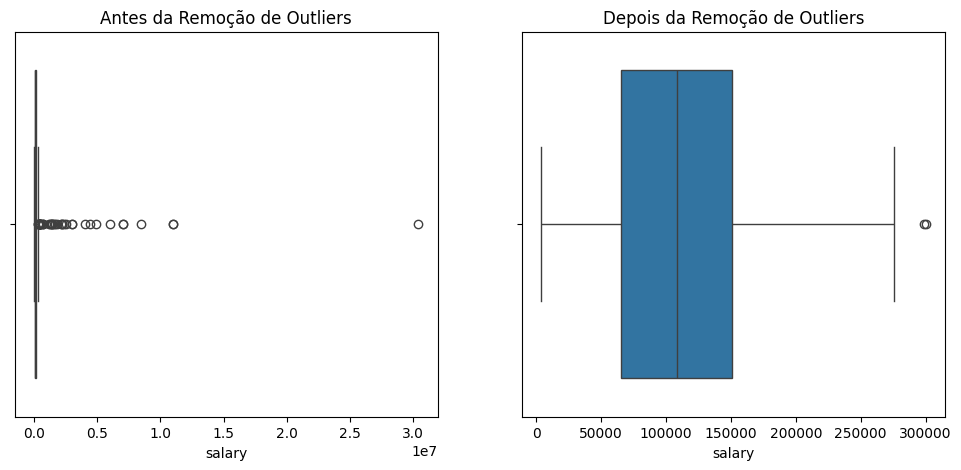

In [51]:
# Visualização antes da remoção
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[column_name])
plt.title('Antes da Remoção de Outliers')

# Visualização depois da remoção
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers[column_name])
plt.title('Depois da Remoção de Outliers')

plt.show()

Remoção de Outliers | Nível de Experiência

Contagens para experience_level:
experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
Número de linhas após a remoção de outliers em níveis de experiência: 493


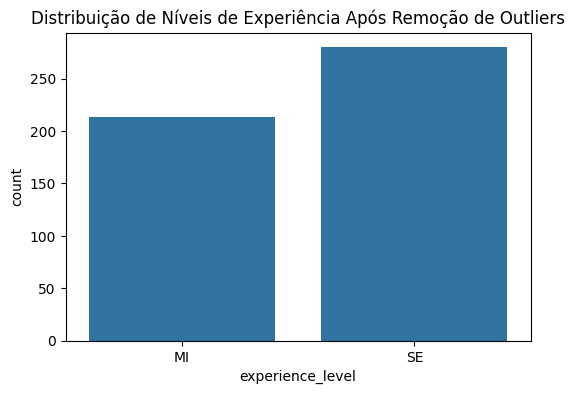

In [55]:
# Definir a coluna para verificar outliers
experience_column = 'experience_level'

# Contar a frequência de cada categoria
experience_counts = df[experience_column].value_counts()

# Exibir as contagens de cada categoria
print(f"Contagens para {experience_column}:")
print(experience_counts)

# Definir um limite para considerar uma categoria como outlier
experience_threshold = 90

# Filtrar categorias com contagem maior que o limite
valid_experience_categories = experience_counts[experience_counts >= experience_threshold].index
df_experience_cleaned = df[df[experience_column].isin(valid_experience_categories)]

# Exibir o número de linhas após a remoção de outliers
print("Número de linhas após a remoção de outliers em níveis de experiência:", len(df_experience_cleaned))

# Visualizar a distribuição de níveis de experiência após a remoção
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=experience_column, data=df_experience_cleaned)
plt.title('Distribuição de Níveis de Experiência Após Remoção de Outliers')
plt.show()

Remoção de Outliers | Tamanho da Empresa

Contagens para company_size:
company_size
M    326
L    198
S     83
Name: count, dtype: int64
Número de linhas após a remoção de outliers em tamanhos de empresa: 524


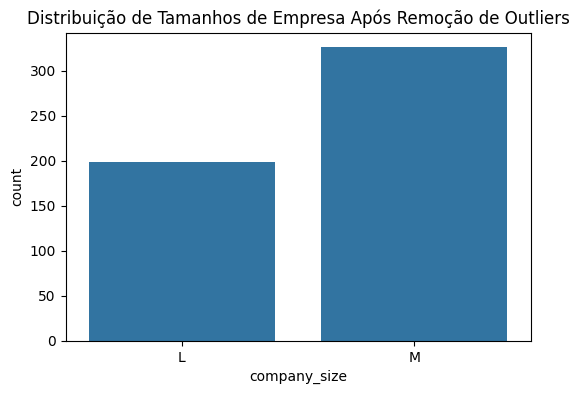

In [56]:
# Definir a coluna para verificar outliers
company_column = 'company_size'

# Contar a frequência de cada categoria
company_counts = df[company_column].value_counts()

# Exibir as contagens de cada categoria
print(f"Contagens para {company_column}:")
print(company_counts)

# Definir um limite para considerar uma categoria como outlier
company_threshold = 100

# Filtrar categorias com contagem maior que o limite
valid_company_categories = company_counts[company_counts >= company_threshold].index
df_company_cleaned = df[df[company_column].isin(valid_company_categories)]

# Exibir o número de linhas após a remoção de outliers
print("Número de linhas após a remoção de outliers em tamanhos de empresa:", len(df_company_cleaned))

# Visualizar a distribuição de tamanhos de empresa após a remoção
plt.figure(figsize=(6, 4))
sns.countplot(x=company_column, data=df_company_cleaned)
plt.title('Distribuição de Tamanhos de Empresa Após Remoção de Outliers')
plt.show()

# Conclusão

A análise do dataset "Data Science Job Salaries" proporcionou uma visão abrangente sobre os salários, níveis de experiência e outros fatores que influenciam as remunerações de profissionais de ciência de dados.

As principais descobertas com os dados analisados:

    1. Distribuição de Salários

  A análise inicial da distribuição salarial revelou uma concentração significativa de salários, indicando que muitos profissionais de ciência de dados estão em níveis de remuneração mais baixos, enquanto uma minoria recebe salários muito altos. Essa assimetria sugere a presença de outliers, que podem impactar modelos preditivos.

A transformação logarítmica dos salários foi uma forma de normalizar a distribuição, tornando-a mais adequada para análise estatística e modelagem.

    2. Nível de Experiência

A distribuição dos níveis de experiência mostrou que a maioria dos profissionais se encontra no nível de Senior (SE), enquanto os níveis Entry (EN) e Executive (EX) estavam sub-representados. Isso pode indicar uma tendência do mercado de trabalho, onde posições sêniores são mais comuns.

O balanceamento das classes foi identificado como um aspecto crucial para qualquer modelagem preditiva que considere o nível de experiência, dado que a maioria dos dados pertence a uma única classe. Portanto foi realizado o balancemanto usando One-Hot-Encoding.

    3. Tipos de Emprego

Os tipos de emprego mostraram uma predominância de posições Full-time (FT), o que pode ser um indicativo das preferências do mercado ou da natureza do trabalho em ciência de dados.

Novamente, o desbalanceamento das classes foi tratado usando One-Hot-Encoding.

    4. Influência do Tamanho da Empresa e Localização

Os salários médios variaram significativamente com o tamanho da empresa, com as grandes empresas oferecendo remunerações mais elevadas. Isso destaca a importância do contexto organizacional na determinação dos salários.

A análise geográfica revelou uma concentração de empregos em países desenvolvidos, como os Estados Unidos e o Reino Unido, refletindo o mercado global de ciência de dados e suas desigualdades.

    5. Análise de Outliers

A presença de outliers foi evidente em várias análises, especialmente nas categorias de experiência e tamanho da empresa. A remoção ou tratamento adequado desses valores pode ser necessário para garantir a precisão dos modelos preditivos.

A remoção dos outliers de variáveis numéricas foi realizada usando o Intervalo Interquartil (IQR).

O IQR é a diferença entre o primeiro quartil (Q1) e o terceiro quartil (Q3). Os valores que estão abaixo de Q1 − 1.5 × IQR ou acima de Q3 + 1.5 × IQR são considerados outliers e podem ser removidos.

**Apenas à título de curiosidade, fiz a remoção de "outliers" das variáveis categóricas `experience_level` e `company_size` usando uma abordagem de contagem, que remove as categorias que têm um número pequeno de ocorrências.**

**Após vizualização dos gráficos e análise dos números apresentados, percebi que essa remoção não se faz necessária, devido o número pequeno de variações dentro dessas categorias, mas optei por deixar esses códigos no documento e incluir esta observação**